In [498]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [499]:
df=pd.read_csv(r'C:\Users\mhuza\Desktop\MINI-Projects-ML\Driectory\data.csv')
df
#small data set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [500]:
print(df.isnull().any())
df=df.drop('Unnamed: 32',axis=1)

print(df.isnull().any())
print(df.isnull().sum())


id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [501]:
df=df.drop('id',axis=1)
print(df.shape)


(569, 31)


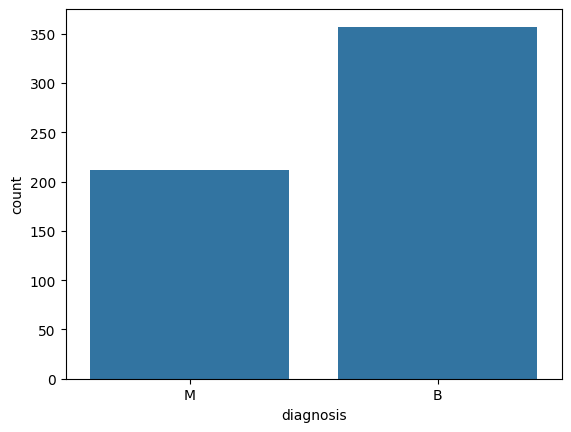

In [502]:
sns.countplot(x='diagnosis',data=df)
plt.show()
# the classes are not massively imbalanced but since the data set is low we will make use of sss and folds to train the model well

In [503]:
numeric_cols=df.select_dtypes(include='number')
# for cols in numeric_cols:
    # plt.figure(figsize=(4,4))
    # sns.boxplot(x='diagnosis',y=cols,data=df)
    # plt.title(f"Boxplot of {cols} by Diagnosis")
    # plt.tight_layout()
    # plt.show()
    # df[cols].hist(bins=30)
    # plt.title(f"Histogram of {cols}")
    # plt.xlabel(cols)
    # plt.ylabel("Frequency")
    # plt.show()
    

In [504]:
corr_matrix = numeric_cols.corr().abs()

mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)
tri_df = corr_matrix.where(mask)

to_drop = [column for column in tri_df.columns if any(tri_df[column] > 0.92)]

df = df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")
print(f"Reduced DataFrame shape: {df.shape}")
df.shape


Dropped columns: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']
Reduced DataFrame shape: (569, 23)


(569, 23)

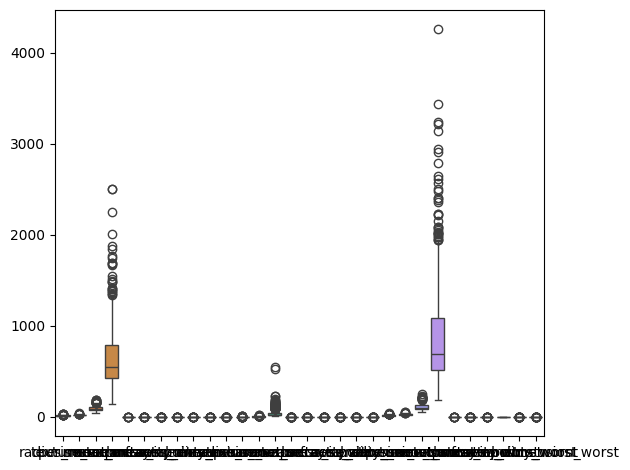

In [505]:
# we will not use smote or another technique to oversample or undersample our dataset
#lets see if scaling is required or not
plt.Figure(figsize=(16,16))
sns.boxplot(data=numeric_cols)
plt.tight_layout()
plt.show()
# scaling is required
# robust scalar attends well to outliers or features with too many extreme values
# but lets try standard scalar as well since it is the best option for features with very different values like ours in this case

In [506]:
#so here is the plan for this model
#1) We have a small data set, so to see which model performs the best, we will create folds using sss
#2? we will create a pipeline that scales,using both scalars 1 by 1, then trains data and then produces an accuracy score for each model(mean acuracy score using cross val)
#3) we will also try testing without sss using models like XGBoost without actually scaling to see how the model perform(since they are less sensitive to scaling ) 

In [507]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']


In [508]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in sss.split(X, y_encoded):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

dt_pipeline = Pipeline([
    ('scale', RobustScaler()),
    ('dt', DecisionTreeClassifier(random_state=30))
])
dt_cv_results = cross_validate(dt_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

lr_pipeline = Pipeline([
    ('scale', RobustScaler()),
    ('lr', LogisticRegression(random_state=30))
])
lr_cv_results = cross_validate(lr_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

rf_pipeline = Pipeline([
    ('scale', RobustScaler()),
    ('rf', RandomForestClassifier(random_state=30))
])
rf_cv_results = cross_validate(rf_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

def print_cv_results(name, results):
    print(f"\n{name} Cross-Validation Scores:")
    for metric in scoring_metrics:
        print(f"{metric.capitalize()}: {results['test_' + metric].mean():.4f} ± {results['test_' + metric].std():.4f}")

print_cv_results("Decision Tree", dt_cv_results)
print_cv_results("Logistic Regression", lr_cv_results)
print_cv_results("Random Forest", rf_cv_results)




Decision Tree Cross-Validation Scores:
Accuracy: 0.9209 ± 0.0091
Precision: 0.8643 ± 0.0134
Recall: 0.9354 ± 0.0078
F1: 0.8984 ± 0.0109

Logistic Regression Cross-Validation Scores:
Accuracy: 0.9693 ± 0.0081
Precision: 0.9818 ± 0.0148
Recall: 0.9355 ± 0.0216
F1: 0.9578 ± 0.0112

Random Forest Cross-Validation Scores:
Accuracy: 0.9517 ± 0.0223
Precision: 0.9414 ± 0.0356
Recall: 0.9297 ± 0.0378
F1: 0.9350 ± 0.0296


In [ ]:
# repeating, this time using standard scalar


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in sss2.split(X, y_encoded):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

dt_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=30))
])
dt_cv_results = cross_validate(dt_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

lr_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(random_state=30))
])
lr_cv_results = cross_validate(lr_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

rf_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=30))
])
rf_cv_results = cross_validate(rf_pipeline, x_train, y_train, cv=3, scoring=scoring_metrics)

def print_cv_results(name, results):
    print(f"\n{name} Cross-Validation Scores:")
    for metric in scoring_metrics:
        print(f"{metric.capitalize()}: {results['test_' + metric].mean():.4f} ± {results['test_' + metric].std():.4f}")

print_cv_results("Decision Tree", dt_cv_results)
print_cv_results("Logistic Regression", lr_cv_results)
print_cv_results("Random Forest", rf_cv_results)


Decision Tree Cross-Validation Scores:
Accuracy: 0.9209 ± 0.0091
Precision: 0.8643 ± 0.0134
Recall: 0.9354 ± 0.0078
F1: 0.8984 ± 0.0109

Logistic Regression Cross-Validation Scores:
Accuracy: 0.9736 ± 0.0054
Precision: 0.9877 ± 0.0087
Recall: 0.9412 ± 0.0081
F1: 0.9639 ± 0.0074

Random Forest Cross-Validation Scores:
Accuracy: 0.9517 ± 0.0223
Precision: 0.9414 ± 0.0356
Recall: 0.9297 ± 0.0378
F1: 0.9350 ± 0.0296


In [ ]:
#Final Model
final_model=LogisticRegression()
scaler=StandardScaler()
x_train_scaled_final=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
final_model.fit(x_train_scaled_final, y_train)

#Lets compare how to model performs on seen and unseen data to find if it may be overfitting
train_pred = final_model.predict(x_train_scaled_final)
print("Training Set Performance:")
print(classification_report(y_train, train_pred, target_names=le.classes_))

y_pred = final_model.predict(x_test_scaled)
print("Test Set Performance:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Training Set Performance:
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       0.99      0.97      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455

Test Set Performance:
              precision    recall  f1-score   support

           B       1.00      0.99      0.99        72
           M       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



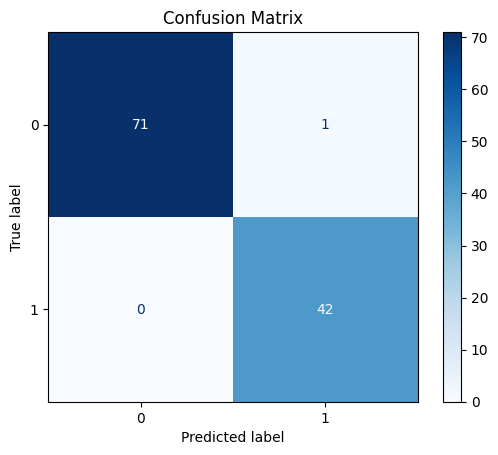

In [513]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_ if hasattr(final_model, "classes_") else None)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()